Training samples: 50000
Test samples: 10000


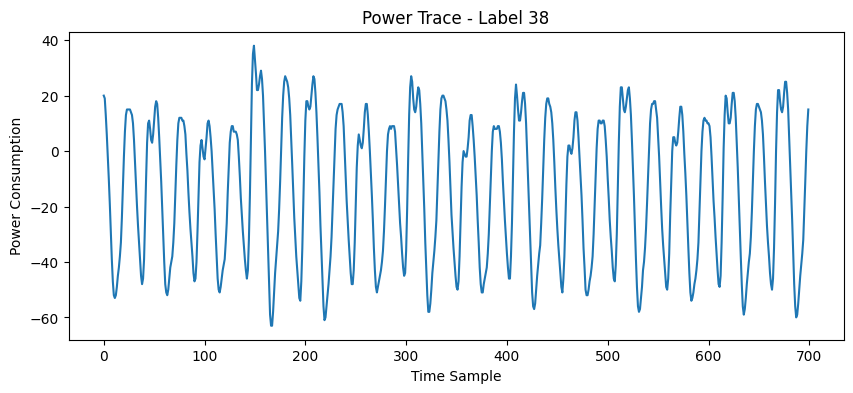

In [1]:
%load_ext autoreload
%autoreload 2

from src.data_loading.ascad_loader import ASCADDataset
import matplotlib.pyplot as plt
import numpy as np
import h5py

# Load dataset
train_data = ASCADDataset(train=True)
test_data = ASCADDataset(train=False)

print(f"Training samples: {len(train_data)}")
print(f"Test samples: {len(test_data)}")

# Visualize first trace
trace, label = train_data[0]
plt.figure(figsize=(10, 4))
plt.plot(trace.numpy())
plt.title(f"Power Trace - Label {label.item()}")
plt.xlabel("Time Sample")
plt.ylabel("Power Consumption")
plt.show()

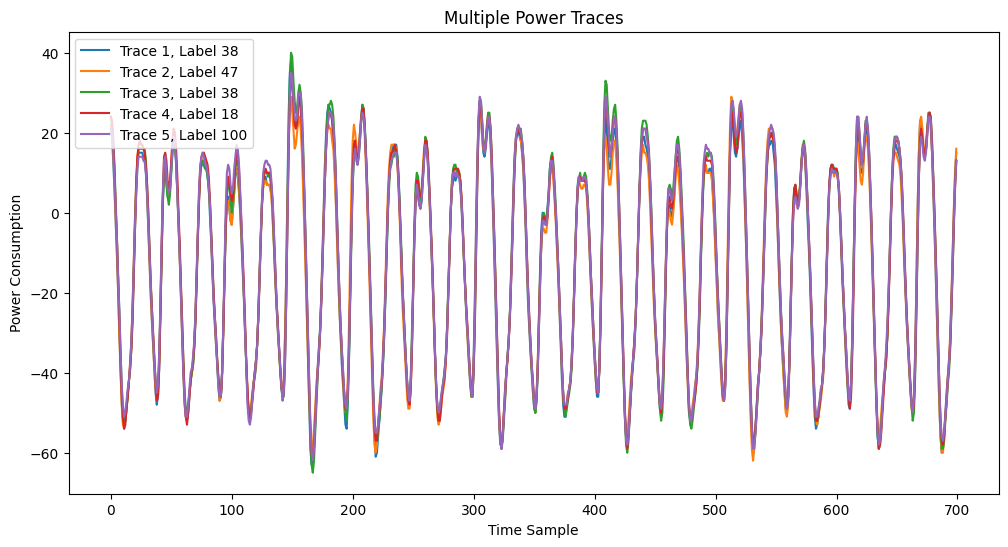

In [2]:
plt.figure(figsize=(12, 6))
for i in range(5):  # Plot 5 traces
    trace, label = train_data[i]
    plt.plot(trace.numpy(), label=f"Trace {i+1}, Label {label.item()}")
plt.title("Multiple Power Traces")
plt.xlabel("Time Sample")
plt.ylabel("Power Consumption")
plt.legend()
plt.show()


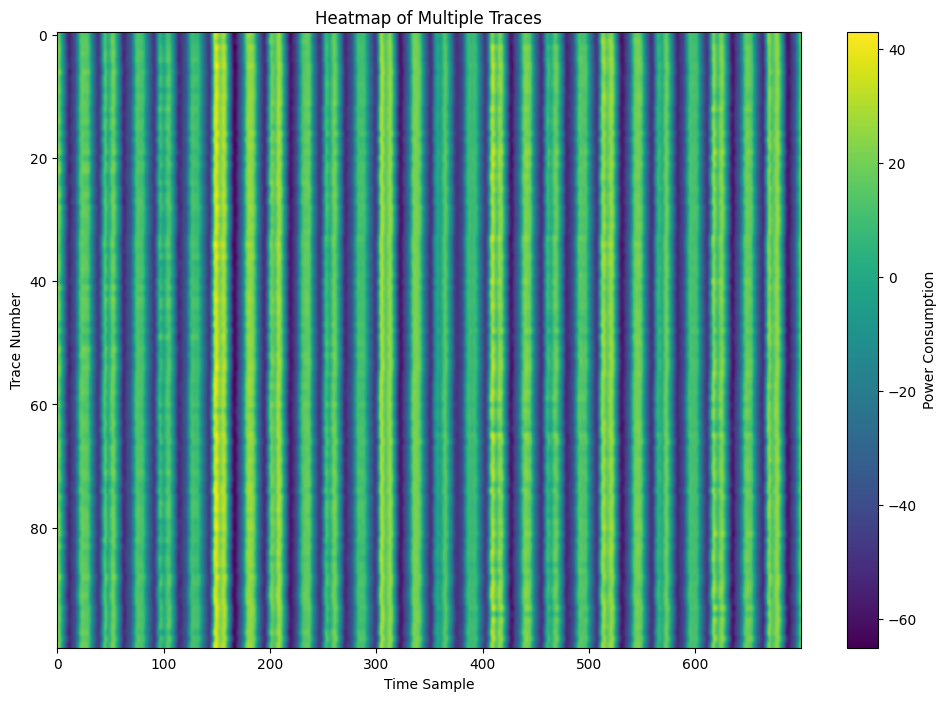

In [4]:
num_traces = 100
traces = np.array([train_data[i][0].numpy() for i in range(num_traces)])
plt.figure(figsize=(12, 8))
plt.imshow(traces, aspect='auto', cmap='viridis')
plt.title("Heatmap of Multiple Traces")
plt.xlabel("Time Sample")
plt.ylabel("Trace Number")
plt.colorbar(label="Power Consumption")
plt.show()

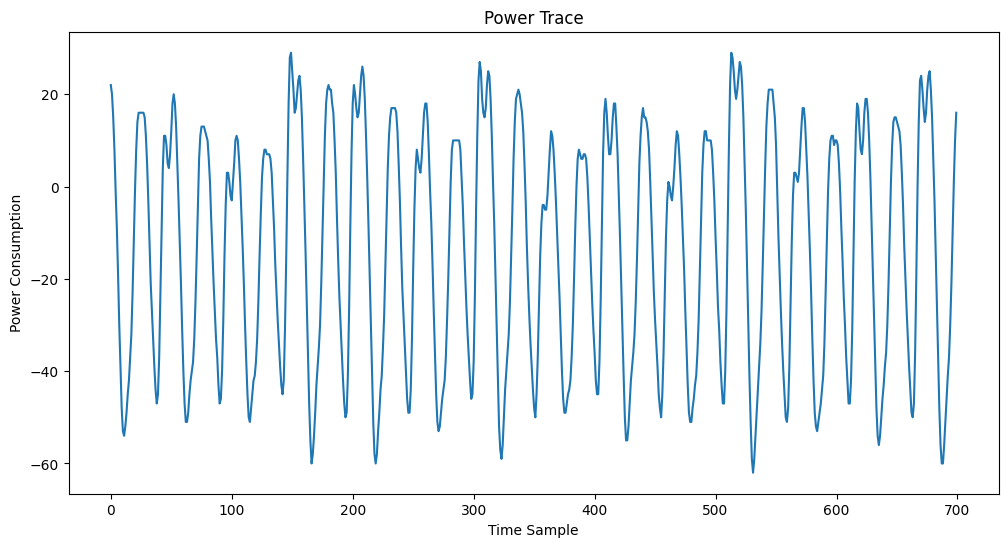

In [5]:
with h5py.File('data/raw/ASCAD.h5', 'r') as f:
    # Access the profiling traces
    traces = f['Profiling_traces']['traces'][:]

plt.figure(figsize=(12, 6))
plt.plot(traces[1])  # Plot the first trace
plt.title("Power Trace")
plt.xlabel("Time Sample")
plt.ylabel("Power Consumption")
plt.show()